In [1]:
import pandas as pd
import numpy as np 
import os

In [2]:
direct_results = pd.read_csv("results_direct.csv")
direct_results = direct_results[direct_results["learning_rate"] == 8e-5]

In [3]:
def print_latex(df: pd.DataFrame):
    # df = df[["lag", "downsample_factor", "filter_time", "learning_rate", "batch_size", "r2", "mse"]].copy()
    if "learning_rate" in df.keys(): 
        df["learning_rate"] = df["learning_rate"].map(lambda x: f"{(x * 1_0000):.1f}")
        df.rename(columns={"learning_rate": "$\\eta (\\cdot 10^{-4})$"}, inplace=True)
    if "filter_time" in df.keys(): 
        df.rename(columns={"filter_time": "$T_f$"}, inplace=True)
    if "enum_feat" in df.keys(): 
        df.rename(columns={"enum_feat": "$X$"}, inplace=True)
    df["r2"] = df["r2"].map(lambda x: f"{x:.3f}")
    df["r2_flex_ext"] = df["r2_flex_ext"].map(lambda x: f"{x:.3f}")
    df["r2_pro_sup"] = df["r2_pro_sup"].map(lambda x: f"{x:.3f}")
    df["mse"] = df["mse"].map(lambda x: f"{round(x)}")
    df.rename(columns={"lag": "Lag", 
                       "downsample_factor": "$q$", 
                       "batch_size": "$B$", 
                       "r2": "$R^2$", 
                       "mse": "\\ac{MSE}", 
                       "r2_flex_ext": "$R_{Flex\\_Ext}^2$", 
                       "r2_pro_sup": "$R_{Pro\\_Sup}^2$"}, inplace=True)
    print(df.to_latex(index=False))

In [4]:
# print_latex(direct_results[["lag", "downsample_factor", "filter_time", "batch_size", "r2_flex_ext", "r2_pro_sup", "r2", "mse"]].copy())

In [5]:
direct_results

,lag,downsample_factor,filter_time,lstm_layers,learning_rate,batch_size,r2_flex_ext,r2_pro_sup,r2,mse
0,1,5,20,"(64, 32)",0.00008,128,0.794433,0.569746,0.682089,474.34995
1,3,1,50,"(64, 32)",0.00008,128,0.865564,0.694060,0.779813,331.23987
2,5,3,50,"(64, 32)",0.00008,128,0.871686,0.620276,0.745981,392.25840
3,5,1,50,"(64, 32)",0.00008,128,0.859892,0.609985,0.734938,406.87564
4,5,5,50,"(64, 32)",0.00008,32,0.866548,0.608888,0.737718,404.64026
5,5,5,20,"(64, 32)",0.00008,32,0.885704,0.622938,0.754320,383.22327
6,3,5,50,"(64, 32)",0.00008,128,0.869941,0.679096,0.774519,342.20038
7,3,5,20,"(64, 32)",0.00008,32,0.890059,0.694413,0.792237,319.21005
8,1,5,50,"(64, 32)",0.00008,128,0.775785,0.559885,0.667833,491.87990
9,3,3,50,"(64, 32)",0.00008,32,0.870505,0.690308,0.780407,332.14820


In [6]:
# PARAMETERS = ["lag", "downsample_factor", "filter_time", "batch_size"]

def duplicates(df: pd.DataFrame, inspect, key: str): 
    # params = PARAMETERS.copy()
    params = inspect
    params.remove(key)
    param_df = df[params]
    x = df.groupby(param_df.columns.tolist())
    res = []
    for info, item in x: 
        y = item[[key, "r2"]].to_dict("list")
        res.append(dict(zip(y[key], y["r2"])))
    res = pd.DataFrame(res)
    res = res[sorted(res.keys().to_list())]
    return res



In [7]:
from typing import Sequence
import matplotlib.pyplot as plt

def plot_results(results: pd.DataFrame, inspect: Sequence[str], export_latex: bool = False): 
    fig, axs = plt.subplots(2, 2, sharey=True)
    for param, ax in zip(inspect, axs.flatten()): 
        res = duplicates(results, list(inspect), param)
        ax.set_title(param)
        if export_latex: 
            export_data = res.T
            export_data["mean"] = export_data.mean(axis=1)
            export_data.to_csv(os.path.join("/home/finn/Documents/LatexMA/data/feat_results/", param), index_label="i")
        ax.plot(res.T, c="orange")
        ax.plot(res.keys(), res.dropna().values.mean(axis=0))
        ax.set_xticks(res.keys())
    plt.tight_layout()
    plt.show()


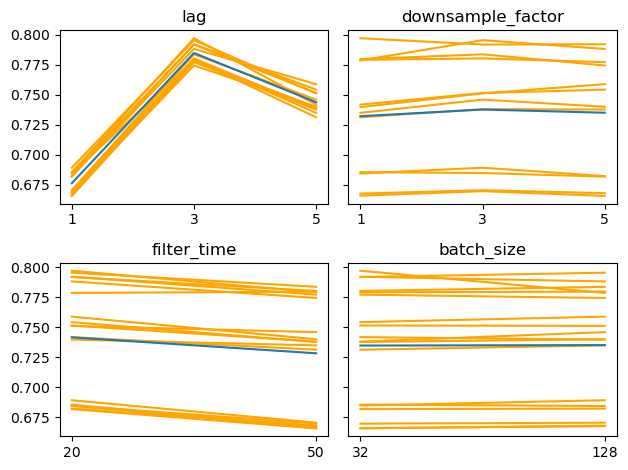

In [8]:
plot_results(direct_results, ("lag", "downsample_factor", "filter_time", "batch_size"), export_latex=False)

In [9]:
feat_results = pd.read_csv("results_feat.csv")

In [10]:
feat_results['enum_feat'] = pd.factorize(feat_results['features'])[0] + 1

In [11]:
feat_results.drop_duplicates("enum_feat")[["features", "enum_feat"]]

,features,enum_feat
0,"('mav', ('zc', 0.003), ('ssc', 0.0003), 'wl')",1
1,"('mav', ('ssc', 0.0003))",2
2,"('rms', ('zc', 0.003), ('ssc', 0.0003))",3
3,"('rms',)",4


In [12]:
feat_results

,lag,features,learning_rate,batch_size,r2_flex_ext,r2_pro_sup,r2,mse,enum_feat
0,1,"('mav', ('zc', 0.003), ('ssc', 0.0003), 'wl')",0.00008,128,0.856186,0.657063,0.756624,368.51440,1
1,1,"('mav', ('ssc', 0.0003))",0.00008,32,0.774816,0.568911,0.671863,484.44998,2
2,5,"('rms', ('zc', 0.003), ('ssc', 0.0003))",0.00010,32,0.913655,0.725740,0.819697,280.28012,3
3,5,"('rms',)",0.00008,32,0.859854,0.638897,0.749375,381.70980,4
4,5,"('rms',)",0.00008,128,0.851714,0.639299,0.745505,385.26140,4
5,3,"('mav', ('ssc', 0.0003))",0.00008,128,0.862592,0.656506,0.759549,365.42572,2
6,5,"('rms', ('zc', 0.003), ('ssc', 0.0003))",0.00008,128,0.914930,0.723500,0.819214,281.62085,3
7,5,"('rms', ('zc', 0.003), ('ssc', 0.0003))",0.00010,128,0.916151,0.726367,0.821258,278.53802,3
8,3,"('rms',)",0.00008,32,0.820277,0.600068,0.710174,434.91040,4
9,5,"('mav', ('ssc', 0.0003))",0.00010,32,0.886843,0.693336,0.790089,321.35500,2


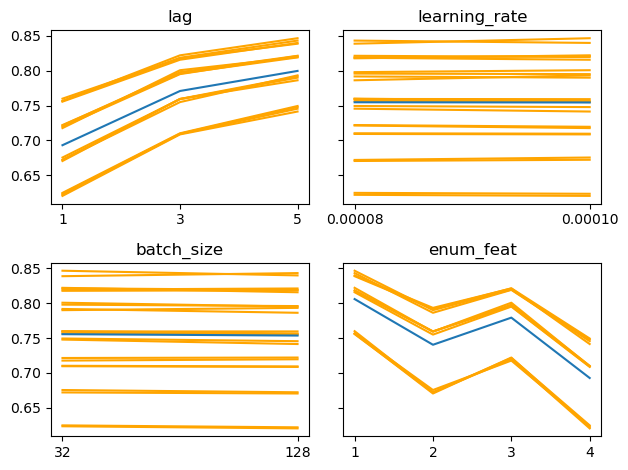

In [13]:
plot_results(feat_results, ("lag", "learning_rate", "batch_size", "enum_feat"), export_latex=False)

In [14]:
# print_latex(feat_results[["lag", "enum_feat", "learning_rate", "batch_size", "r2_flex_ext", "r2_pro_sup", "r2", "mse"]].copy())

In [15]:
narx_results = pd.read_csv("results_narx.csv")

In [16]:
narx_results

,use_direct_model,teacher_forcing,n_past,learning_rate,batch_size,epochs,lag,filter_time,downsample_factor,warm_up,r2_teacher_flex,r2_teacher_pron,r2_teacher,r2_ss_flex,r2_ss_pron,r2_ss,features
0,True,False,3,0.00008,32,1000,3,20.0,1.0,20.0,0.982412,0.938414,0.960413,0.848302,0.501543,0.674923,NaN
1,True,True,3,0.00008,32,150,3,20.0,1.0,NaN,0.999396,0.994273,0.996834,-0.129823,0.135819,0.003001,NaN
2,False,False,3,0.00010,32,1000,1,NaN,NaN,20.0,0.980663,0.918062,0.949363,0.914503,0.660310,0.787406,"('mav', ('zc', 0.003), ('ssc', 0.0003), 'wl')"
3,False,False,3,0.00010,32,1000,5,NaN,NaN,20.0,0.986540,0.949842,0.968191,0.919209,0.654767,0.786989,"('mav', ('zc', 0.003), ('ssc', 0.0003), 'wl')"
4,True,False,3,0.00008,128,1000,1,20.0,3.0,20.0,0.975529,0.926312,0.950920,0.796895,0.461818,0.629357,NaN
5,False,True,3,0.00010,32,150,1,NaN,NaN,NaN,0.999331,0.994855,0.997093,-0.691826,-1.118748,-0.905280,"('mav', ('zc', 0.003), ('ssc', 0.0003), 'wl')"
6,True,True,3,0.00008,128,150,1,20.0,3.0,NaN,0.998003,0.994253,0.996128,-0.301721,0.115338,-0.093192,NaN
7,False,True,3,0.00010,32,150,5,NaN,NaN,NaN,0.998997,0.994450,0.996723,-2.550738,-0.054242,-1.302486,"('mav', ('zc', 0.003), ('ssc', 0.0003), 'wl')"


In [17]:
narx_results["model_name"] = ""
narx_results.loc[(
    narx_results[["use_direct_model", "batch_size", "lag"]] == [True, 128, 1]).all(axis=1), "model_name"] = "DM2"

narx_results.loc[(
    narx_results[["use_direct_model", "batch_size", "lag"]] == [True, 32, 3]).all(axis=1), "model_name"] = "DM1"

narx_results.loc[(
    narx_results[["use_direct_model", "learning_rate", "lag"]] == [False, 1e-4, 5]).all(axis=1), "model_name"] = "FEM1"

# use caution -- actually learning_rate = 8e-5, lag = 1
narx_results.loc[(
    narx_results[["use_direct_model", "learning_rate", "lag"]] == [False, 1e-4, 1]).all(axis=1), "model_name"] = "FEM2"

In [18]:
narx_results = narx_results[["model_name", "teacher_forcing", "r2_teacher_flex", "r2_teacher_pron", "r2_teacher", "r2_ss_flex", "r2_ss_pron", "r2_ss"]]

In [19]:
narx_results = narx_results.sort_values("model_name")

In [20]:
def narx_print_latex(df): 
    df = df.copy()
    for key in df.keys():
        if not key.startswith("r2"): 
            continue
        df[key] = df[key].map(lambda x: f"{x:.3f}")
    df["teacher_forcing"] = np.where(df["teacher_forcing"], "tf", "sds")
    df.rename(columns={"model_name": "name", 
                       "teacher_forcing": " training", 
                       "r2_teacher_flex": "$R_{1, FE}^2$", 
                       "r2_teacher_pron": "$R_{1, PS}^2$", 
                       "r2_teacher": "$R_{1}^2$", 
                       "r2_ss_flex": "$R_{2, FE}^2$", 
                       "r2_ss_pron": "$R_{2, PS}^2$", 
                       "r2_ss": "$R_{2}^2$"}, inplace=True)
    print(df.to_latex(index=False))

narx_print_latex(narx_results)

\begin{tabular}{llllllll}
\toprule
name &  training & $R_{1, FE}^2$ & $R_{1, PS}^2$ & $R_{1}^2$ & $R_{2, FE}^2$ & $R_{2, PS}^2$ & $R_{2}^2$ \\
\midrule
DM1 & sds & 0.982 & 0.938 & 0.960 & 0.848 & 0.502 & 0.675 \\
DM1 & tf & 0.999 & 0.994 & 0.997 & -0.130 & 0.136 & 0.003 \\
DM2 & sds & 0.976 & 0.926 & 0.951 & 0.797 & 0.462 & 0.629 \\
DM2 & tf & 0.998 & 0.994 & 0.996 & -0.302 & 0.115 & -0.093 \\
FEM1 & sds & 0.987 & 0.950 & 0.968 & 0.919 & 0.655 & 0.787 \\
FEM1 & tf & 0.999 & 0.994 & 0.997 & -2.551 & -0.054 & -1.302 \\
FEM2 & sds & 0.981 & 0.918 & 0.949 & 0.915 & 0.660 & 0.787 \\
FEM2 & tf & 0.999 & 0.995 & 0.997 & -0.692 & -1.119 & -0.905 \\
\bottomrule
\end{tabular}



In [21]:
narx_results

,model_name,teacher_forcing,r2_teacher_flex,r2_teacher_pron,r2_teacher,r2_ss_flex,r2_ss_pron,r2_ss
0,DM1,False,0.982412,0.938414,0.960413,0.848302,0.501543,0.674923
1,DM1,True,0.999396,0.994273,0.996834,-0.129823,0.135819,0.003001
4,DM2,False,0.975529,0.926312,0.950920,0.796895,0.461818,0.629357
6,DM2,True,0.998003,0.994253,0.996128,-0.301721,0.115338,-0.093192
3,FEM1,False,0.986540,0.949842,0.968191,0.919209,0.654767,0.786989
7,FEM1,True,0.998997,0.994450,0.996723,-2.550738,-0.054242,-1.302486
2,FEM2,False,0.980663,0.918062,0.949363,0.914503,0.660310,0.787406
5,FEM2,True,0.999331,0.994855,0.997093,-0.691826,-1.118748,-0.905280


In [68]:
#fem1 
fem1 = feat_results["r2"].max()

In [69]:
#fem2
fem2 = feat_results.loc[feat_results["lag"] == 1]["r2"].max()

In [70]:
# dm1
dm1 = direct_results["r2"].max()

In [71]:
# dm2
dm2 = direct_results.loc[direct_results["lag"] == 1]["r2"].max()

In [72]:
fem1, fem2, dm1, dm2

(0.8467727899551392,
 0.7599249482154846,
 0.7972812056541443,
 0.6890890598297119)

In [98]:
n_dm1 = narx_results.loc[(narx_results["model_name"] == "DM1")& (~narx_results["teacher_forcing"])]["r2_ss"].iloc[0]
n_dm2 = narx_results.loc[(narx_results["model_name"] == "DM2")& (~narx_results["teacher_forcing"])]["r2_ss"].iloc[0]

In [99]:
n_dm1, n_dm2

(np.float64(0.6749228239059448), np.float64(0.6293567419052124))

In [100]:
n_fem1 = narx_results.loc[(narx_results["model_name"] == "FEM1")& (~narx_results["teacher_forcing"])]["r2_ss"].iloc[0]
n_fem2 = narx_results.loc[(narx_results["model_name"] == "FEM2")& (~narx_results["teacher_forcing"])]["r2_ss"].iloc[0]

In [101]:
n_fem1, n_fem2

(np.float64(0.7869892716407776), np.float64(0.7874059677124023))

In [120]:
model_res = {"direct": (dm1, dm2),
             "feat_ext": (fem1, fem2), 
             "n_direct": (n_dm1, n_dm2), 
             "n_fe": (n_fem1, n_fem2)}

model_res

{'direct': (0.7972812056541443, 0.6890890598297119),
 'feat_ext': (0.8467727899551392, 0.7599249482154846),
 'n_direct': (np.float64(0.6749228239059448), np.float64(0.6293567419052124)),
 'n_fe': (np.float64(0.7869892716407776), np.float64(0.7874059677124023))}

(0.5, 1.0)

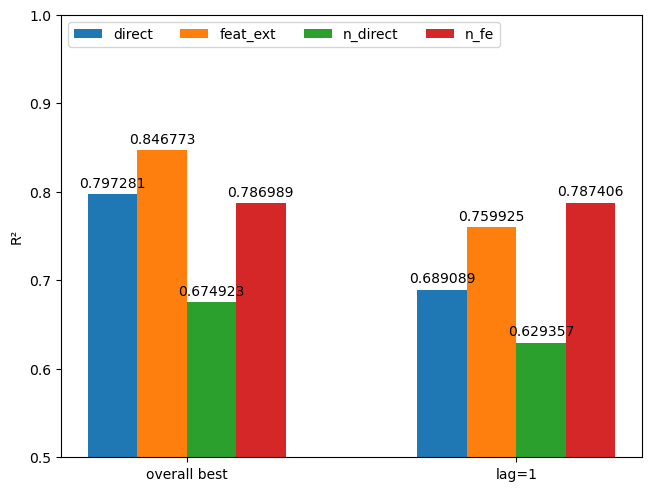

In [143]:
x = np.arange(2)  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in model_res.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel("R²")
ax.set_xticks(x + width+0.075, ("overall best", "lag=1"))
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0.5, 1.0)